In [14]:
#library(reshape)
library(neuralnet)
library(NeuralNetTools)
library(caret)
library(tidyverse)

In [15]:
# creating training data set
TKS=c(20,10,30,20,80,30)
CSS=c(90,20,40,50,50,80)
Placed=c(1,0,0,0,1,1)
# Here, you will combine multiple columns or features into a single set of data
(df=data.frame(TKS,CSS,Placed))

TKS,CSS,Placed
<dbl>,<dbl>,<dbl>
20,90,1
10,20,0
30,40,0
20,50,0
80,50,1
30,80,1


In [16]:
# fit neural network
nn=neuralnet(Placed~TKS+CSS,data=df, hidden=3,
             act.fct = "logistic",
             linear.output = FALSE, lifesign = 'minimal',threshold = 0.00000001)

hidden: 3    thresh: 1e-08    rep: 1/1    steps:     281	error: 0      	time: 0.03 secs


In [17]:
nn

$call
neuralnet(formula = Placed ~ TKS + CSS, data = df, hidden = 3, 
    threshold = 1e-08, lifesign = "minimal", act.fct = "logistic", 
    linear.output = FALSE)

$response
  Placed
1      1
2      0
3      0
4      0
5      1
6      1

$covariate
     TKS CSS
[1,]  20  90
[2,]  10  20
[3,]  30  40
[4,]  20  50
[5,]  80  50
[6,]  30  80

$model.list
$model.list$response
[1] "Placed"

$model.list$variables
[1] "TKS" "CSS"


$err.fct
function (x, y) 
{
    1/2 * (y - x)^2
}
<bytecode: 0x56216e956988>
<environment: 0x562173d13118>
attr(,"type")
[1] "sse"

$act.fct
function (x) 
{
    1/(1 + exp(-x))
}
<bytecode: 0x56216e952020>
<environment: 0x562173d135b0>
attr(,"type")
[1] "logistic"

$linear.output
[1] FALSE

$data
  TKS CSS Placed
1  20  90      1
2  10  20      0
3  30  40      0
4  20  50      0
5  80  50      1
6  30  80      1

$exclude
NULL

$net.result
$net.result[[1]]
             [,1]
[1,] 9.999990e-01
[2,] 1.601574e-08
[3,] 6.580502e-08
[4,] 2.529764e-05
[5,] 9.999850e-01


[[1]]
[[1]][[1]]
            [,1]        [,2]        [,3]
[1,]  4.81571311 -10.8802356  9.07551310
[2,]  0.05179277   1.0218504  0.02222681
[3,] -0.10071774  -0.8761732 -0.15342897

[[1]][[2]]
          [,1]
[1,]  14.78556
[2,] -20.87966
[3,]  28.90427
[4,] -12.60943

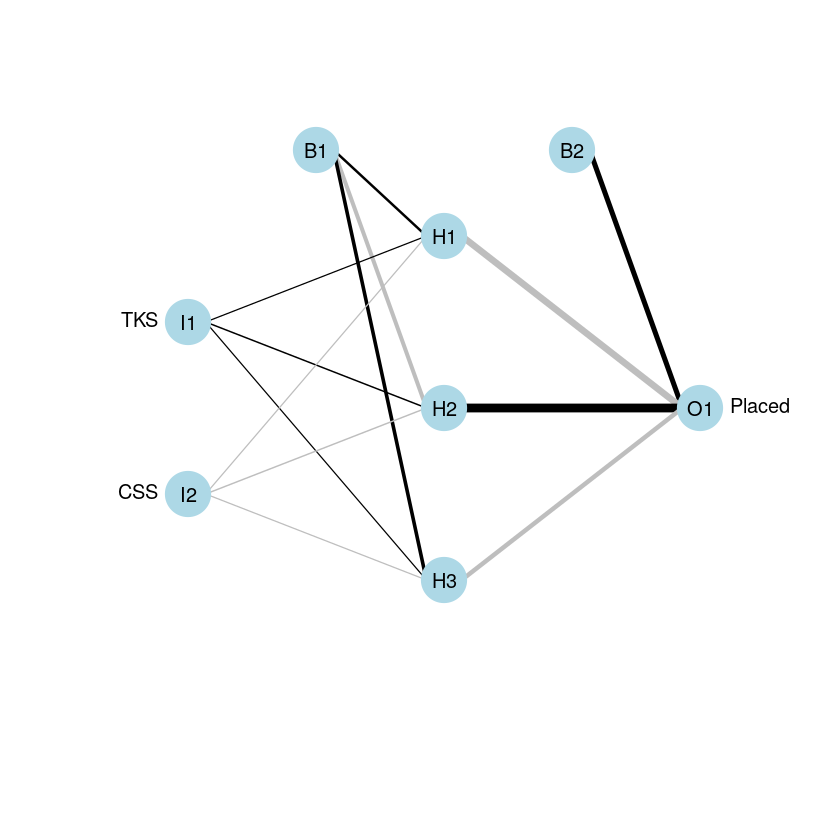

In [18]:
nn$weights
plotnet(nn)

In [19]:
nn$weights

[[1]]
[[1]][[1]]
            [,1]        [,2]        [,3]
[1,]  4.81571311 -10.8802356  9.07551310
[2,]  0.05179277   1.0218504  0.02222681
[3,] -0.10071774  -0.8761732 -0.15342897

[[1]][[2]]
          [,1]
[1,]  14.78556
[2,] -20.87966
[3,]  28.90427
[4,] -12.60943

In [20]:
TKS=c(30,40,85)
CSS=c(85,50,40)
test=data.frame(TKS,CSS)

Predict=neuralnet::compute(nn,test)
Predict$net.result

9.999952e-01
4.071500e-07
9.999701e-01


## Dividend Info

In [22]:
# dividend info -----------------------------------------------------------
df = read_csv('https://transfer.sh/pKW3B/dividend_info.csv')
#df = read_csv("~/repos/fa084-2019-1S/10_neural_networks/data/dividendinfo.csv")

Parsed with column specification:
cols(
  dividend = col_double(),
  fcfps = col_double(),
  earnings_growth = col_double(),
  de = col_double(),
  mcap = col_double(),
  current_ratio = col_double()
)


In [23]:
normalize = function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

normdf = as.data.frame(lapply(df, normalize))
head(normdf)


# Training and Test Data
trainset = normdf[1:160, ]
testset = normdf[161:200, ]

dividend,fcfps,earnings_growth,de,mcap,current_ratio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.54361055,0.0000000,0.26717557,0.6350575,0.3177037
1,0.99188641,0.3383319,0.26208651,0.7571839,0.5052078
1,0.54969574,0.3427127,0.03307888,0.6594828,0.6798973
0,0.07302231,0.5428812,0.41730280,0.4094828,0.6682316
1,0.58215010,0.3654591,0.45038168,0.8347701,0.8560637
1,0.77687627,0.2183656,0.10178117,0.7442529,0.6135678


hidden: 3, 2    thresh: 0.01    rep: 1/1    steps:   14123	error: 1.0066 	time: 2.15 secs


[[1]]
[[1]][[1]]
           [,1]       [,2]      [,3]
[1,]  1.8136225  0.9746458  3.121050
[2,] -1.5664359 -7.0939268 -1.473173
[3,] -0.1854274  1.3614388 -2.810232
[4,]  2.3867966 -5.8759491  0.207849
[5,] -2.2487359 -4.4239778 -4.336243
[6,] -5.1232948  2.3076402 -3.483122

[[1]][[2]]
          [,1]      [,2]
[1,] -2.891726  1.379961
[2,]  7.916374 -3.189037
[3,] 14.623772 -2.807892
[4,]  6.635779 -5.301863

[[1]][[3]]
            [,1]
[1,]    2.405355
[2,] -209.093202
[3,]  159.999308

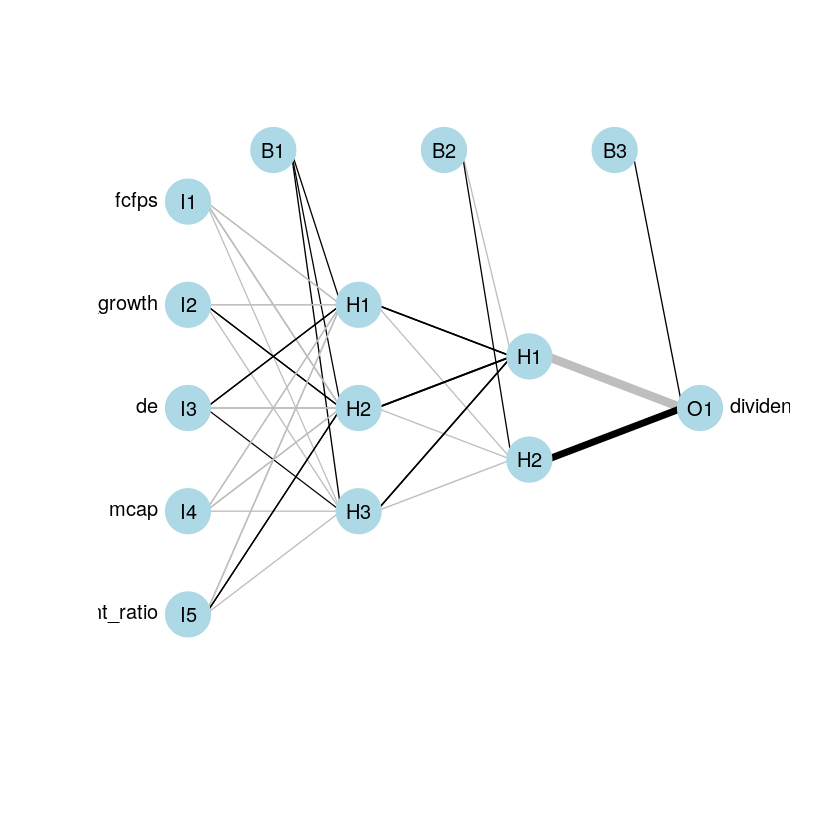

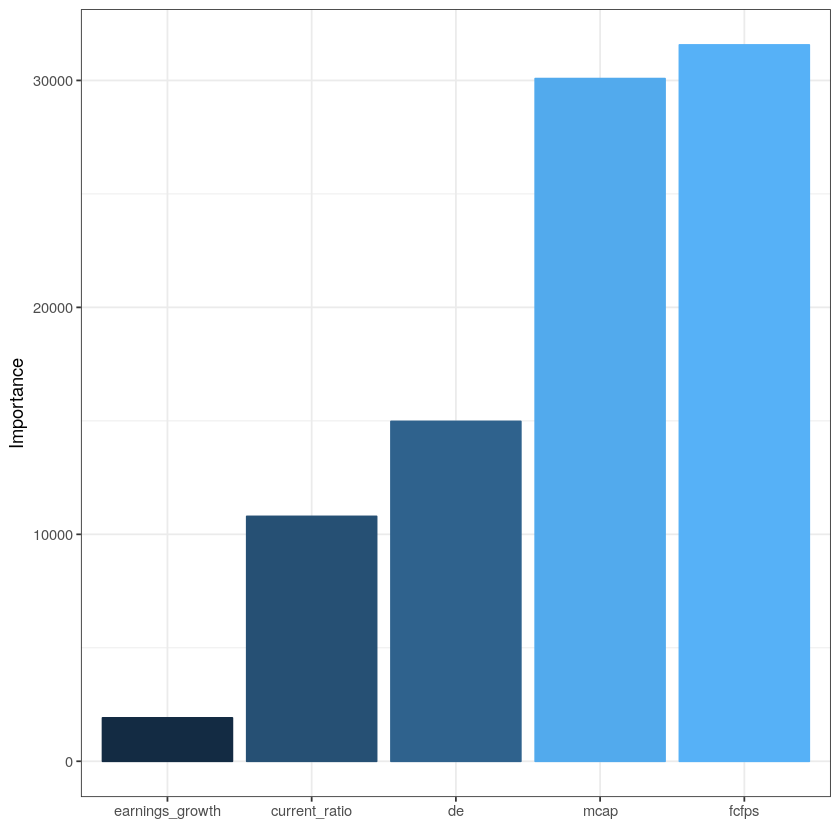

In [24]:
nn = neuralnet(dividend ~ ., data=trainset, hidden=c(3,2), 
               linear.output=FALSE, threshold=0.01, 
               lifesign = 'minimal')

plotnet(nn)
nn$weights
olden(nn)

In [26]:
# Test set performance
nn.results = neuralnet::compute(nn, testset)
results = data.frame(actual = testset$dividend, prediction = nn.results$net.result)


results$prediction = round(results$prediction,digits = 0)
table(actual = results$actual,predicted = results$prediction)

      predicted
actual  0  1
     0 17  0
     1  4 19

## Titanic

In [27]:
titanic_df = read_csv('https://transfer.sh/6xede/mod_titanic.csv') %>% select(-PassengerId)
head(titanic_df)

normdf = as.data.frame(lapply(titanic_df, normalize))
head(normdf)
set.seed(31)
test_rows = sample(nrow(normdf),0.3*nrow(normdf))
train = normdf[-test_rows,]
test = normdf[test_rows,]

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Age = col_double(),
  Fare = col_double(),
  has_family_member = col_double(),
  pclass_1 = col_double(),
  pclass_2 = col_double(),
  person_female = col_double(),
  person_child = col_double()
)


Survived,Age,Fare,has_family_member,pclass_1,pclass_2,person_female,person_child
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,22,7.2500,1,0,0,0,0
1,38,71.2833,1,1,0,1,0
1,26,7.9250,0,0,0,1,0
1,35,53.1000,1,1,0,1,0
0,35,8.0500,0,0,0,0,0
0,18,8.4583,0,0,0,0,0


Survived,Age,Fare,has_family_member,pclass_1,pclass_2,person_female,person_child
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.2734561,2.763221e-05,1,0,0,0,0
1,0.4738820,2.716848e-04,1,1,0,1,0
1,0.3235626,3.020486e-05,0,0,0,1,0
1,0.4363021,2.023821e-04,1,1,0,1,0
0,0.4363021,3.068128e-05,0,0,0,0,0
0,0.2233496,3.223745e-05,0,0,0,0,0


## Usando `neuralnet`

In [28]:
nn = neuralnet(Survived ~ ., data=train, hidden=c(2,1), linear.output=FALSE, threshold=0.01, lifesign = 'minimal')

hidden: 2, 1    thresh: 0.01    rep: 1/1    steps:    9236	error: 67.42719	time: 3.15 secs


[[1]]
[[1]][[1]]
              [,1]       [,2]
[1,]    0.03735545  5.7460343
[2,]  -11.68143922  1.1600028
[3,]   -3.58474475  0.9326127
[4,]   -0.27283671 -0.3493105
[5,] -172.35884377 -7.0654294
[6,]   -2.02677322 -5.1187855
[7,]  220.49085824  0.8053017
[8,]    3.95538460 -0.3774545

[[1]][[2]]
          [,1]
[1,]  1.282831
[2,]  7.197763
[3,] -9.281344

[[1]][[3]]
          [,1]
[1,] -1.817942
[2,]  5.781102

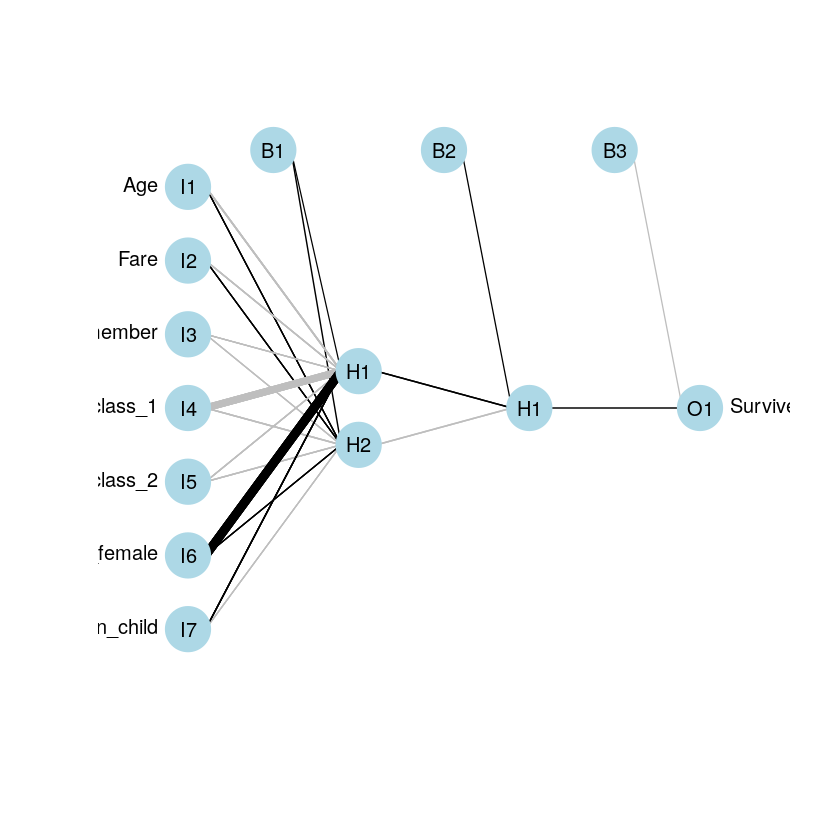

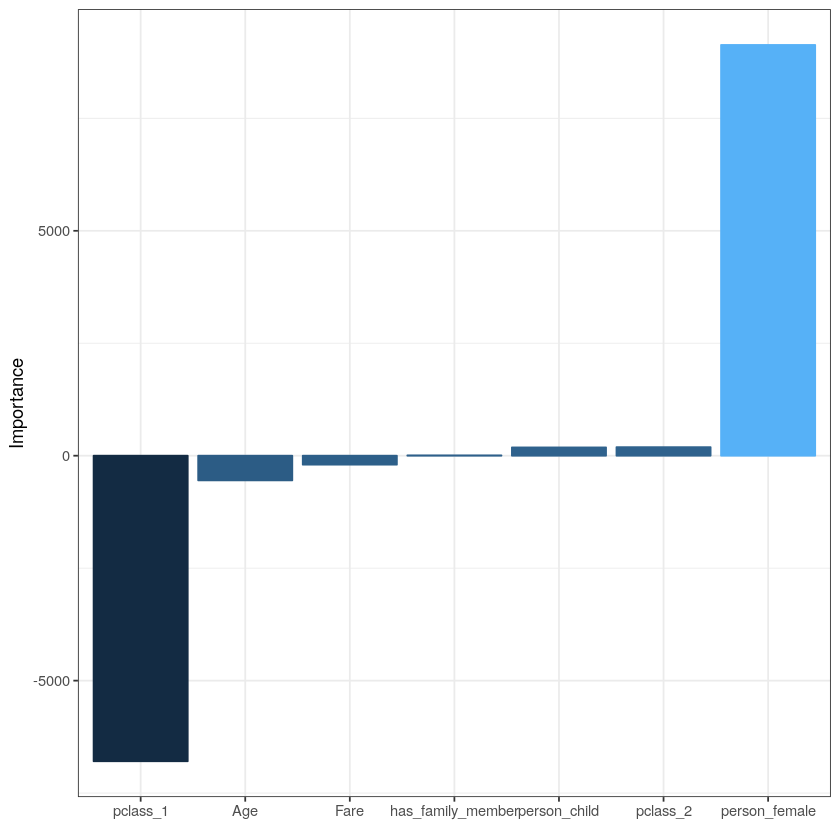

In [15]:
plotnet(nn)
nn$weights
olden(nn)

In [19]:
nn.results = neuralnet::compute(nn,test)
results = data.frame(actual = test$Survived, prediction = nn.results$net.result)
#results
results$prediction = round(results$prediction,digits = 0)
table(actual = results$actual,predicted = results$prediction)

      predicted
actual   0   1
     0 246   7
     1  69  70

## Usando `caret` e `nnet`

In [20]:
train$Survived = as.factor(train$Survived)

In [23]:
t0=Sys.time()
nnetGrid <-  expand.grid(size = seq(from = 2, to = 10, by = 2),
                        decay = seq(from = 0.1, to = 0.5, by = 0.1))

nnetFit = train(Survived ~ ., data=train, trace=FALSE,
                method = "nnet",
                tuneGrid = nnetGrid)
t1=Sys.time()
t1-t0

Time difference of 46.99813 secs

In [24]:
nnetFit

Neural Network 

916 samples
  7 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 916, 916, 916, 916, 916, 916, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   2    0.1    0.7744566  0.5042062
   2    0.2    0.7754432  0.5080033
   2    0.3    0.7738971  0.5053187
   2    0.4    0.7732369  0.5052798
   2    0.5    0.7748768  0.5106551
   4    0.1    0.7712832  0.4968599
   4    0.2    0.7756123  0.5078386
   4    0.3    0.7746494  0.5072358
   4    0.4    0.7737260  0.5072472
   4    0.5    0.7740527  0.5091289
   6    0.1    0.7724908  0.5000022
   6    0.2    0.7768228  0.5105231
   6    0.3    0.7746659  0.5073990
   6    0.4    0.7736293  0.5069654
   6    0.5    0.7737964  0.5083986
   8    0.1    0.7713177  0.4973669
   8    0.2    0.7752644  0.5071157
   8    0.3    0.7745357  0.5071223
   8    0.4    0.7734688  0.5067612
   8    0.5    0.7741550  0.5092047
  10    0.1    0.

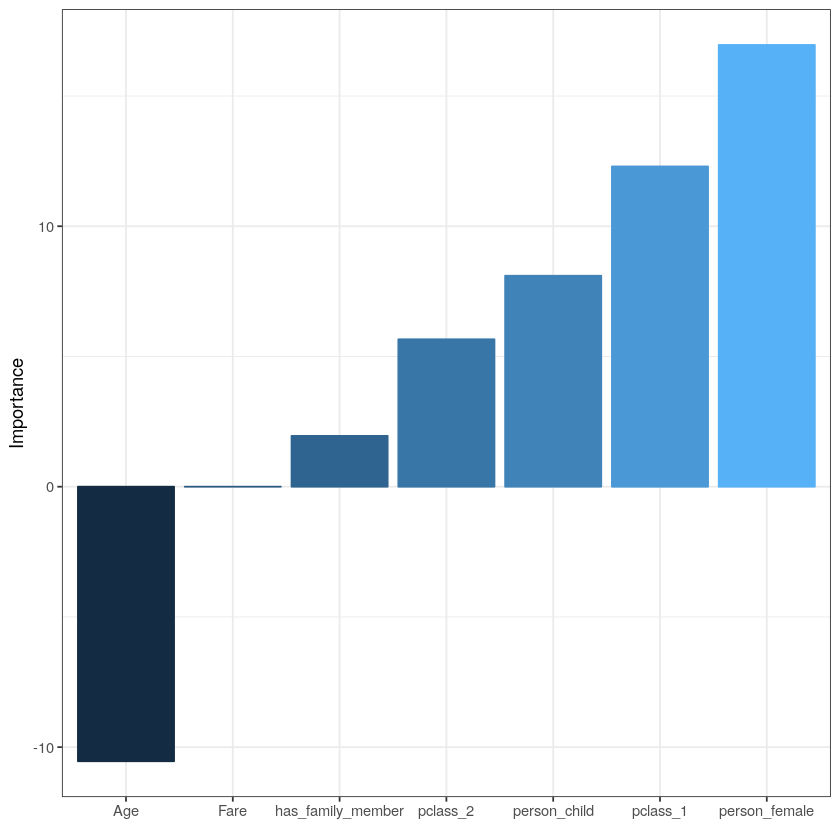

      predicted
actual   0   1
     0 230  23
     1  51  88

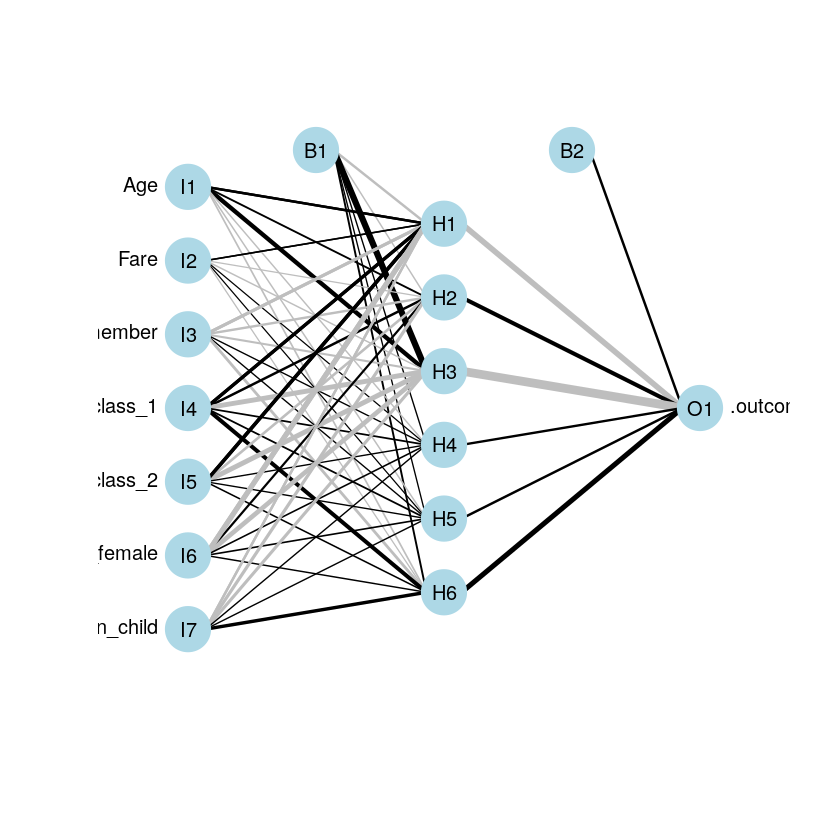

In [25]:
nncaret = nnetFit$finalModel
olden(nncaret)
plotnet(nncaret)

nn.results = predict(nnetFit,test)
results = data.frame(actual = test$Survived, prediction = nn.results)
#results
#results$prediction = round(results$prediction,digits = 0)
table(actual = results$actual,predicted = results$prediction)